### Loading the libraries and the dataset

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


df = pd.read_csv("../data/train.csv")

### Splitting to train and test

In [18]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training and evaluating the model

In [20]:

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7642276422764228

Confusion Matrix:
 [[72  9]
 [20 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83        81
           1       0.71      0.52      0.60        42

    accuracy                           0.76       123
   macro avg       0.75      0.71      0.72       123
weighted avg       0.76      0.76      0.75       123



### Plotting the coefficients

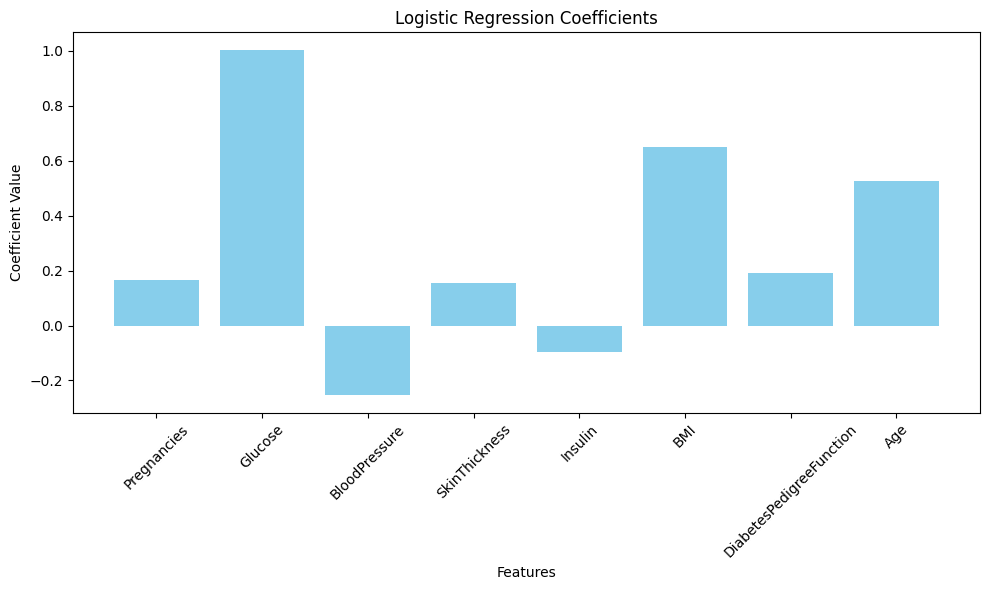

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(X.columns, logreg.coef_[0], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Saving the model to a file

In [22]:
import joblib

joblib.dump(logreg, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']